# World War 2 THOR Data analysis |  by: Sidhartha Murthy
---
## What's the story on this data?
This data can be found at this [link](https://data.world/datamil/world-war-ii-thor-data). It consists of mission data from the allies in World War 2.




In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

First, let's read in the CSV file. 

In [2]:
mission_data = pd.read_csv("../data/THOR_WWII_DATA_CLEAN.csv", encoding='ISO-8859-1')
mission_data.head(20)

,WWII_ID,MASTER_INDEX_NUMBER,MSNDATE,THEATER,NAF,COUNTRY_FLYING_MISSION,TGT_COUNTRY_CODE,TGT_COUNTRY,TGT_LOCATION,TGT_TYPE,...,CALLSIGN,ROUNDS_AMMO,SPARES_RETURN_AC,WX_FAIL_AC,MECH_FAIL_AC,MISC_FAIL_AC,TARGET_COMMENT,MISSION_COMMENTS,SOURCE,DATABASE_EDIT_COMMENTS
0,1,NaN,8/15/1943,MTO,12 AF,USA,13.0,ITALY,SPADAFORA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4285,20028.0,2/20/1945,PTO,5 AF,USA,NaN,PHILIPPINE ISLANDS,PUERTA PRINCESA,UNIDENTIFIED TARGET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,8/15/1943,MTO,12 AF,USA,13.0,ITALY,COSENZA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,8/15/1943,MTO,12 AF,USA,13.0,ITALY,GIOJA TAURO,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,8167,14639.0,2/23/1945,PTO,5 AF,USA,NaN,PHILIPPINE ISLANDS,BALETE PASS,WOODED AREA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11286,20037.0,2/26/1945,PTO,5 AF,USA,NaN,PHILIPPINE ISLANDS,PUERTA PRINCESA,UNIDENTIFIED TARGET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,26429,1343.0,3/11/1945,PTO,5 AF,USA,NaN,FORMOSA AND RYUKYU ISLANDS,FORMOSA,UNIDENTIFIED TARGET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,26430,15422.0,3/11/1945,PTO,5 AF,USA,NaN,PHILIPPINE ISLANDS,CABALLO,UNIDENTIFIED TARGET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,8/15/1943,MTO,12 AF,USA,13.0,ITALY,SCILLA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,8/15/1943,MTO,12 AF,USA,13.0,ITALY,GIOJA TAURO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's get a sense of the shape of this data and what it describes. We'll look at the columns first.

In [3]:
cols = mission_data.columns
cols


Index(['WWII_ID', 'MASTER_INDEX_NUMBER', 'MSNDATE', 'THEATER', 'NAF',
       'COUNTRY_FLYING_MISSION', 'TGT_COUNTRY_CODE', 'TGT_COUNTRY',
       'TGT_LOCATION', 'TGT_TYPE', 'TGT_ID', 'TGT_INDUSTRY_CODE',
       'TGT_INDUSTRY', 'SOURCE_LATITUDE', 'SOURCE_LONGITUDE', 'LATITUDE',
       'LONGITUDE', 'UNIT_ID', 'MDS', 'AIRCRAFT_NAME', 'MSN_TYPE',
       'TGT_PRIORITY', 'TGT_PRIORITY_EXPLANATION', 'AC_ATTACKING', 'ALTITUDE',
       'ALTITUDE_FEET', 'NUMBER_OF_HE', 'TYPE_OF_HE', 'LBS_HE', 'TONS_OF_HE',
       'NUMBER_OF_IC', 'TYPE_OF_IC', 'LBS_IC', 'TONS_OF_IC', 'NUMBER_OF_FRAG',
       'TYPE_OF_FRAG', 'LBS_FRAG', 'TONS_OF_FRAG', 'TOTAL_LBS', 'TOTAL_TONS',
       'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
       'TAKEOFF_LONGITUDE', 'AC_LOST', 'AC_DAMAGED', 'AC_AIRBORNE',
       'AC_DROPPING', 'TIME_OVER_TARGET', 'SIGHTING_METHOD_CODE',
       'SIGHTING_EXPLANATION', 'BDA', 'CALLSIGN', 'ROUNDS_AMMO',
       'SPARES_RETURN_AC', 'WX_FAIL_AC', 'MECH_FAIL_AC', 'MISC_FAIL_AC',
       

In [4]:
mission_data.shape

(178281, 62)

Just to clarify:
- MSNDATE is Mission Date
- Theater (PTO = Pacific Theater, ETO = European Theater, MTO = Mediterranean Theater)
- NAF is Numbered Air Force (Usually for USAAF)
- HE is High Explosive, IC is Incendiary, FRAG is fragmentation, AC is aircraft
- BDA is battle damage assessment

There are 62 columns and 178,281 rows in the dataset.


***Let's make a quick function that gives us our columns sorted by the percent of records missing. We can get a sense of which columns have the most complete data.***


In [5]:
def percent_missing(data):
    percents = data.isnull().sum() * 100 / len(data)
    missing_value_df = pd.DataFrame({'column_name': data.columns,'percent_missing': percents}).set_index('column_name')
    missing_value_df.sort_values('percent_missing', inplace=True)
    return missing_value_df

In [6]:
percent_missing(mission_data).head(20)

,percent_missing
column_name,
WWII_ID,0.000000
MSNDATE,0.000000
MDS,0.065066
AIRCRAFT_NAME,0.077967
TGT_COUNTRY,0.335986
TGT_LOCATION,1.269344
THEATER,1.771361
MASTER_INDEX_NUMBER,2.268890
LATITUDE,4.888911


These are the top 20 columns by completeness. There's a huge drop-off at tons of high explosive, so lets end at target priority. 

Let's quickly convert the dates to a python datetime object.

In [7]:
mission_data['Date'] = pd.to_datetime(mission_data['MSNDATE'])
mission_data

,WWII_ID,MASTER_INDEX_NUMBER,MSNDATE,THEATER,NAF,COUNTRY_FLYING_MISSION,TGT_COUNTRY_CODE,TGT_COUNTRY,TGT_LOCATION,TGT_TYPE,...,ROUNDS_AMMO,SPARES_RETURN_AC,WX_FAIL_AC,MECH_FAIL_AC,MISC_FAIL_AC,TARGET_COMMENT,MISSION_COMMENTS,SOURCE,DATABASE_EDIT_COMMENTS,Date
0,1,NaN,8/15/1943,MTO,12 AF,USA,13.0,ITALY,SPADAFORA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-08-15
1,4285,20028.0,2/20/1945,PTO,5 AF,USA,NaN,PHILIPPINE ISLANDS,PUERTA PRINCESA,UNIDENTIFIED TARGET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945-02-20
2,3,NaN,8/15/1943,MTO,12 AF,USA,13.0,ITALY,COSENZA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-08-15
3,4,NaN,8/15/1943,MTO,12 AF,USA,13.0,ITALY,GIOJA TAURO,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1943-08-15
4,8167,14639.0,2/23/1945,PTO,5 AF,USA,NaN,PHILIPPINE ISLANDS,BALETE PASS,WOODED AREA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945-02-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,135311,NaN,12/14/1942,PTO,RAAF,AUSTRALIA,NaN,NEW GUINEA,BUNA AREA - 5 DESTROYERS / MOUTH OF KUMUSI RIVER,ENEMY WARSHIPS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942-12-14
178277,55692,NaN,9/18/1940,MTO,SAAF,SOUTH AFRICA,24.0,ETHIOPIA,YAVELLO,AERODROME,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DUST CLOUDS IN THE MIDDLE EAST,AUSTEN,1940-09-18
178278,133019,NaN,11/17/1942,PTO,RAAF,AUSTRALIA,NaN,TIMOR,BAUCAU,BUILDINGS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942-11-17
178279,178741,NaN,2/16/1945,PTO,RNZAF,NEW ZEALAND,NaN,NEW IRELAND,KAVIENG SWEEP,VARIOUS TARGETS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945-02-16



## Exploratory Data Analysis:
---
Let's take a very broad look at the data, examining things like country of origin, etc.

In [8]:
countries = mission_data["COUNTRY_FLYING_MISSION"]
countries_missions = countries.value_counts(dropna=False)
countries_missions

USA              94165
NaN              51787
GREAT BRITAIN    31361
NEW ZEALAND        633
AUSTRALIA          316
SOUTH AFRICA        19
Name: COUNTRY_FLYING_MISSION, dtype: int64

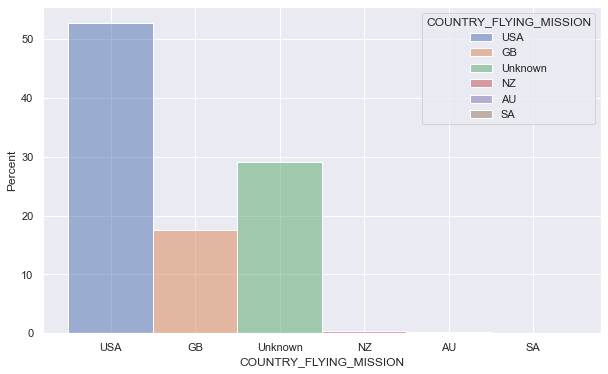

In [9]:
countries_cleaned = countries.replace(to_replace={'GREAT BRITAIN':'GB','NEW ZEALAND':'NZ', 'AUSTRALIA':'AU', 'SOUTH AFRICA':'SA'}).fillna(value='Unknown')
mission_data['COUNTRY_FLYING_MISSION'] = countries_cleaned
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(data=mission_data, x='COUNTRY_FLYING_MISSION', hue='COUNTRY_FLYING_MISSION', stat='percent');

Here we see that the US was responsible for a little over 50% of the missions flown, with Great Britain around 17%. There is a massive Unknown contigent that accounts for around 28-29%. We will try to understand the Unknown country missions later on. Let'd focus in on the US's contributions.

## United States of America
---
Do we have data from the different branches of the U.S. Military? This is mainly the:
- U.S. Army Air Forces
- U.S. Navy
- U.S. Marine Corps

In [10]:
us_data = mission_data.loc[mission_data['COUNTRY_FLYING_MISSION'] == 'USA']
def filter_theater(country_data, theater):
    ret_df = country_data.loc[country_data['THEATER'] == theater].drop(['SIGHTING_METHOD_CODE', 'SPARES_RETURN_AC', 'AC_LOST',
       'TGT_PRIORITY_EXPLANATION', 'AC_DAMAGED', 'TGT_INDUSTRY',
       'TGT_INDUSTRY_CODE', 'TGT_ID', 'CALLSIGN', 'WX_FAIL_AC',
       'TGT_COUNTRY_CODE', 'MISC_FAIL_AC', 'MECH_FAIL_AC'], axis=1)
    return ret_df

us_pac = filter_theater(us_data, 'PTO')
us_pac['AIRCRAFT_NAME'].unique()

array(['A20', 'B25', 'P47', 'B17', 'P51', 'P38', 'B24', 'B29', 'P39',
       'P61', 'P40', 'B26', 'A24', 'P70', 'A26', 'F06', 'P401', 'A36',
       'LB30', nan, 'CATALINA', 'P400', 'B32', 'HUDSON'], dtype=object)

In the Pacific Theater, we don't really see any U.S. Navy or Marine Corps aircraft types, which is the theater we would most expect them. Therefore, we can assume that this dataset only contains U.S. Army Air Forces data. Let's look at the theaters where the USAAF was active:

In [11]:
theaters = us_data['THEATER'].unique()
theaters

array(['MTO', 'PTO', nan, 'CBI', 'ETO', 'EAST AFRICA'], dtype=object)

**The Theaters Are:** 
MTO = Mediterranean Theater, PTO = Pacific Theater, CBI = China Burma India, ETO = European Theater, and East Africa.
Let's zoom in on the Pacific Theater initially.
### Pacific Theater of Operations
---
We've already done some basic EDA on the Pacific data and pulled out the aircraft that the USAAF used in the theater. Let's dive a little deeper.

In [12]:
us_pac['AIRCRAFT_NAME'].value_counts(dropna=False)

B24         13375
B25          6333
A20          3453
P38          2644
B29          2390
P47          2318
P51          1789
P39           890
B17           855
P40           547
B26           212
P61           136
A26            98
A24            82
P70            60
F06            19
P400           16
B32            10
LB30            7
NaN             7
A36             3
P401            1
CATALINA        1
HUDSON          1
Name: AIRCRAFT_NAME, dtype: int64

The Catalina and Hudson missions (mostly patrol aircraft) might be interesting, but let's drop them and add the P401 to the P-40 missions.

In [13]:
us_pac = us_pac.drop(us_pac[(us_pac.AIRCRAFT_NAME == 'CATALINA') | (us_pac.AIRCRAFT_NAME == 'HUDSON')].index)
us_pac.replace({'P400':'P40', 'P401':'P40'}, inplace=True)
us_pac.AIRCRAFT_NAME.value_counts()

B24     13375
B25      6333
A20      3453
P38      2644
B29      2390
P47      2318
P51      1789
P39       890
B17       855
P40       564
B26       212
P61       136
A26        98
A24        82
P70        60
F06        19
B32        10
LB30        7
A36         3
Name: AIRCRAFT_NAME, dtype: int64

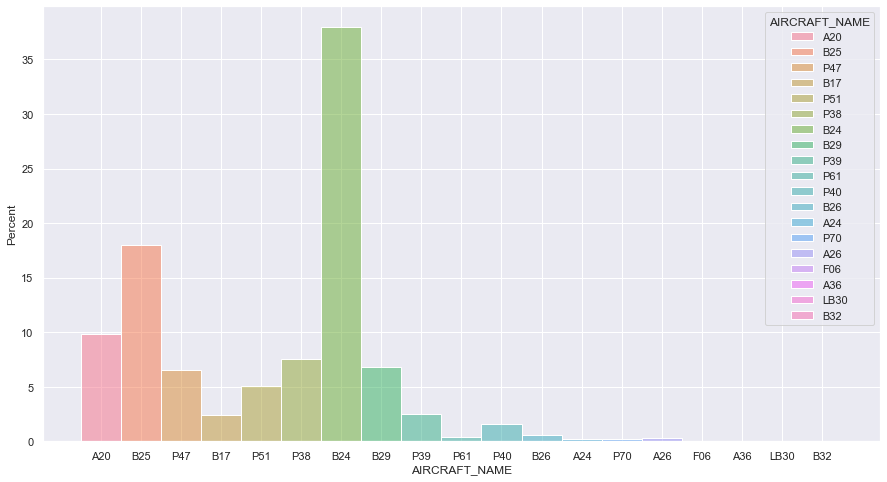

In [14]:
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(data=us_pac,x='AIRCRAFT_NAME', stat='percent', hue='AIRCRAFT_NAME');

Clearly, the B-24 Liberator flew the largest perentage of bombing sorties in the Pacific Theater. However, this is just the raw percentage of sorties flown by aircraft. Let's try to get the tonnage dropped by aircraft type.

In [15]:
us_pac.columns

Index(['WWII_ID', 'MASTER_INDEX_NUMBER', 'MSNDATE', 'THEATER', 'NAF',
       'COUNTRY_FLYING_MISSION', 'TGT_COUNTRY', 'TGT_LOCATION', 'TGT_TYPE',
       'SOURCE_LATITUDE', 'SOURCE_LONGITUDE', 'LATITUDE', 'LONGITUDE',
       'UNIT_ID', 'MDS', 'AIRCRAFT_NAME', 'MSN_TYPE', 'TGT_PRIORITY',
       'AC_ATTACKING', 'ALTITUDE', 'ALTITUDE_FEET', 'NUMBER_OF_HE',
       'TYPE_OF_HE', 'LBS_HE', 'TONS_OF_HE', 'NUMBER_OF_IC', 'TYPE_OF_IC',
       'LBS_IC', 'TONS_OF_IC', 'NUMBER_OF_FRAG', 'TYPE_OF_FRAG', 'LBS_FRAG',
       'TONS_OF_FRAG', 'TOTAL_LBS', 'TOTAL_TONS', 'TAKEOFF_BASE',
       'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE', 'TAKEOFF_LONGITUDE',
       'AC_AIRBORNE', 'AC_DROPPING', 'TIME_OVER_TARGET',
       'SIGHTING_EXPLANATION', 'BDA', 'ROUNDS_AMMO', 'TARGET_COMMENT',
       'MISSION_COMMENTS', 'SOURCE', 'DATABASE_EDIT_COMMENTS', 'Date'],
      dtype='object')

In [16]:
def groupby_custom(theater_data, group_by: str):
    return theater_data.groupby(by=group_by).agg({'LATITUDE':'mean', 'LONGITUDE':'mean', 'AC_ATTACKING': ['mean','sum'],
'ALTITUDE':'mean', 'ALTITUDE_FEET':'mean', 'NUMBER_OF_HE':['mean','sum'], 'LBS_HE':['mean','sum'],'TONS_OF_HE':['mean','sum'],
'NUMBER_OF_IC':['sum', 'mean'], 'LBS_IC':['mean','sum'], 'TONS_OF_IC':['mean','sum'], 'NUMBER_OF_FRAG':['mean','sum'],
'LBS_FRAG':['mean','sum'], 'TONS_OF_FRAG':['mean','sum'], 'TOTAL_LBS':['mean','sum'], 'TOTAL_TONS':['mean','sum'],
'TAKEOFF_LATITUDE': 'mean', 'TAKEOFF_LONGITUDE': 'mean', 'AC_AIRBORNE':['mean','sum'], 'AC_DROPPING':['mean','sum'],
"ROUNDS_AMMO":['mean','sum']}
)

In [17]:
us_pac_by_ac = groupby_custom(us_pac, 'AIRCRAFT_NAME')
us_pac_by_ac

LATITUDE   LONGITUDE AC_ATTACKING             ALTITUDE  \
                    mean        mean         mean      sum        mean   
AIRCRAFT_NAME                                                            
A20             5.234331  132.133669     8.476516  27252.0   11.279633   
A24             8.742689  165.020135    13.416667    644.0   22.775000   
A26            30.171480  128.743732     6.750000    621.0   49.765306   
A36            -3.333333  116.250000     3.333333     10.0   25.000000   
B17            -4.344381  143.630517     3.724185   2741.0  174.749767   
B24             6.998071  134.818842     4.831196  59530.0  105.482584   
B25             4.425713  138.804913     6.227365  37003.0   37.307786   
B26            -6.366944  145.409682     6.157895   1287.0   61.442675   
B29            32.555275  134.038305    13.398048  26086.0  153.566901   
B32            20.795694  124.503917     1.800000     18.0  152.000000   
F06             6.213158  120.660526     3.105263     59.0    1.100000   
LB30           -5.765145  133.108152     1.857143     13.0         NaN   
P38            10.224794  125.494845     8.712456  22452.0   29.089975   
P39            -4.178951  147.215347     6.889785   5126.0   19.494471   
P40             6.429115  133.092575     7.222222   3640.0   20.427230   
P47             6.250686  133.991609     7.854630  16966.0   41.282483   
P51            16.992291  122.792227     8.704909  15251.0   24.616971   
P61            25.018382  132.193505     1.631579    217.0   46.205882   
P70            -4.024444  145.532778     1.392857     78.0    8.260000   

              ALTITUDE_FEET NUMBER_OF_HE                       LBS_HE  \
                       mean         mean            sum          mean   
AIRCRAFT_NAME                                                           
A20              855.826033    52.661396   90682.923077   1980.952381   
A24             1423.937500    23.811594    1643.000000   2300.000000   
A26             4867.714286    52.000000    2288.000000           NaN   
A36             2500.000000     6.153846      18.461538           NaN   
B17             5743.442779    20.985423   14396.000000  10848.669202   
B24             8968.447314    40.557776  374997.192308   8277.192982   
B25             2717.626293    36.769466  156307.000000   6018.650794   
B26             4466.877005    33.555556    4530.000000   8940.366972   
B29            12973.977376   125.264479  125640.272727  12750.000000   
B32            15200.000000    23.444444     211.000000           NaN   
F06               38.105263    12.666667     152.000000           NaN   
LB30            1928.571429    10.833333      65.000000   3450.000000   
P38             2635.075617    32.488905   68811.500000   2200.000000   
P39              952.199288     8.226291    4804.153846           NaN   
P40             1486.620408    12.140884    4395.000000   2463.157895   
P47             3658.055115    21.958104   39832.000000           NaN   
P51             2313.809847    28.264975   40108.000000           NaN   
P61             3454.148148    11.476923    1492.000000           NaN   
P70              623.703704     8.000000     136.000000           NaN   

                          ... TOTAL_TONS              TAKEOFF_LATITUDE  \
                     sum  ...       mean          sum             mean   
AIRCRAFT_NAME             ...                                            
A20              41600.0  ...   5.452845   18528.7685              NaN   
A24              16100.0  ...   4.941961     380.5310        -7.977778   
A26                  0.0  ...   7.969388     781.0000              NaN   
A36                  0.0  ...   1.000000       3.0000              NaN   
B17            2853200.0  ...   4.877657    3950.9025         7.004884   
B24             471800.0  ...  10.903848  143298.3720        -7.970117   
B25             758350.0  ...   5.326728   32301.2800        35.716667   
B26             974500.0  ...   6.245795

We see all the important data by aircraft type here, aggregated by mean, sum, or both. Here is a method that, given grouped data with multi-indexes, will go to the category and specific agreggation function and return a dataframe with only that agregation.

Let's take just the total tonnage dropped and sort that descending.

In [18]:
def stat_by_group(grouped_theater_data, category, stat):
    query_stat = [(category, stat)]
    stat_by_group = grouped_theater_data.loc[:, query_stat].sort_values(by=query_stat, ascending=False)
    stat_by_group.columns = stat_by_group.columns.to_flat_index()
    stat_by_group.reset_index(inplace=True)
    return stat_by_group


In [19]:
us_pac_tonnage_by_ac = stat_by_group(us_pac_by_ac, 'TOTAL_TONS', 'sum')
us_pac_tonnage_by_ac

,AIRCRAFT_NAME,"(TOTAL_TONS, sum)"
0,B29,190438.1920
1,B24,143298.3720
2,B25,32301.2800
3,A20,18528.7685
4,P38,17417.2000
5,P47,9436.0000
6,P51,7192.0000
7,B17,3950.9025
8,P39,1398.0000
9,P40,1335.2360


In the Pacific theater, the **B-29 Superfortress** dropped the highest tonnage.

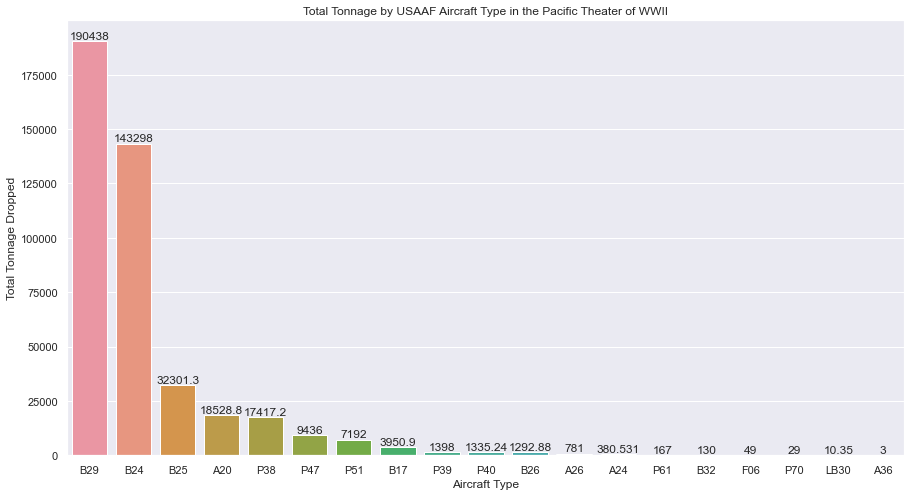

In [20]:
plot_1 = sns.barplot(data = us_pac_tonnage_by_ac, x = 'AIRCRAFT_NAME', y = ('TOTAL_TONS', 'sum'))
plot_1.bar_label(plot_1.containers[0])
plt.ylabel('Total Tonnage Dropped')
plt.xlabel('Aircraft Type')
plt.title("Total Tonnage by USAAF Aircraft Type in the Pacific Theater of WWII");


## European Theater of Operations
---
First, let's filter our data and make our ETO dataframe.

In [21]:
us_eur = filter_theater(us_data, 'ETO')
us_eur

,WWII_ID,MASTER_INDEX_NUMBER,MSNDATE,THEATER,NAF,COUNTRY_FLYING_MISSION,TGT_COUNTRY,TGT_LOCATION,TGT_TYPE,SOURCE_LATITUDE,...,AC_DROPPING,TIME_OVER_TARGET,SIGHTING_EXPLANATION,BDA,ROUNDS_AMMO,TARGET_COMMENT,MISSION_COMMENTS,SOURCE,DATABASE_EDIT_COMMENTS,Date
128,13146,210434.0,8/11/1944,ETO,9 AF,USA,FRANCE,BREST,STRONG POINTS,4824,...,10.0,NaN,VISUAL,NaN,NaN,NaN,NaN,NaN,NaN,1944-08-11
129,13109,210453.0,8/11/1944,ETO,9 AF,USA,FRANCE,BREST,STRONG POINTS,4824,...,19.0,NaN,VISUAL,NaN,NaN,NaN,NaN,NaN,NaN,1944-08-11
130,13120,107496.0,8/11/1944,ETO,9 AF,USA,FRANCE,BREST,STRONG POINTS,4824,...,12.0,NaN,VISUAL,NaN,NaN,NaN,NaN,NaN,NaN,1944-08-11
131,13121,210446.0,8/11/1944,ETO,9 AF,USA,FRANCE,BREST,STRONG POINTS,4824,...,12.0,NaN,VISUAL,NaN,NaN,NaN,NaN,NaN,NaN,1944-08-11
134,13149,210506.0,8/11/1944,ETO,9 AF,USA,FRANCE,BREST,STRONG POINTS,4824,...,9.0,NaN,VISUAL,NaN,NaN,NaN,NaN,NaN,NaN,1944-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177806,178268,185915.0,2/15/1945,ETO,8 AF,USA,GERMANY,DRESDEN,RR CENTER,5103,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945-02-15
177807,178269,116755.0,2/15/1945,ETO,8 AF,USA,GERMANY,MUNSTER,CITY AREA,50.125133,...,12.0,NaN,H2X,NaN,NaN,NaN,NaN,NaN,NaN,1945-02-15
177808,178270,185810.0,2/15/1945,ETO,8 AF,USA,GERMANY,MUNSTER,CITY AREA,50.125133,...,12.0,NaN,H2X,NaN,NaN,NaN,NaN,NaN,NaN,1945-02-15
177809,178271,185827.0,2/15/1945,ETO,8 AF,USA,GERMANY,MUNSTER,CITY AREA,50.125133,...,12.0,NaN,H2X,NaN,NaN,NaN,NaN,NaN,NaN,1945-02-15


Let's look at what columns are the most complete.

In [22]:
percent_missing(us_eur).head(14)

,percent_missing
column_name,
WWII_ID,0.000000
AIRCRAFT_NAME,0.000000
MDS,0.000000
TGT_LOCATION,0.000000
TGT_COUNTRY,0.000000
Date,0.000000
NAF,0.000000
THEATER,0.000000
MSNDATE,0.000000


Now, let's look at the number of missions flown according to each aircraft type.

Text(0.5, 0, 'Aircraft Type')

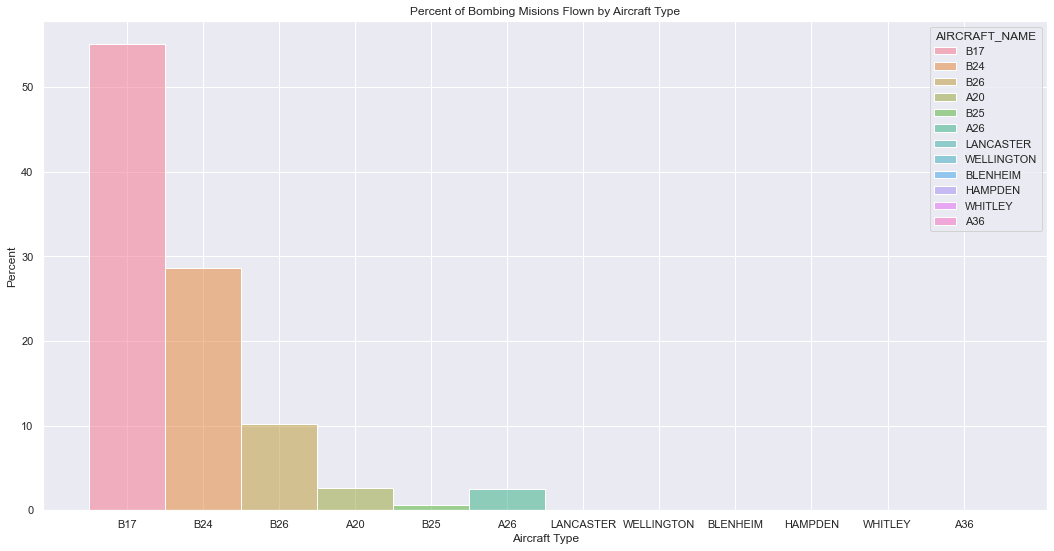

In [23]:
sns.set(rc={'figure.figsize':(18,9)})
us_eur_plot_1 = sns.histplot(data=us_eur, x = 'AIRCRAFT_NAME', hue='AIRCRAFT_NAME', stat='percent')
plt.title('Percent of Bombing Misions Flown by Aircraft Type');
plt.xlabel('Aircraft Type')

Now, let's once again group this data by aircraft type in order to visualize the tonnage dropped by each aircraft type in Europe.

In [24]:
us_eur_by_ac = groupby_custom(us_eur, 'AIRCRAFT_NAME')
us_eur_by_ac

LATITUDE  LONGITUDE AC_ATTACKING              ALTITUDE  \
                    mean       mean         mean       sum        mean   
AIRCRAFT_NAME                                                            
A20            47.686606   4.710181     2.118519     286.0   94.194831   
A26            47.829801   8.310829     1.000000     158.0   87.692153   
A36            45.343333   0.466667          NaN       0.0         NaN   
B17            50.310410  10.824038    11.578190  119869.0  231.174238   
B24            49.164620  12.064782    15.842096   89191.0  216.920369   
B25            46.315248  12.492128    19.170455    1687.0  107.553191   
B26            49.632481   4.544386    12.891566    1070.0  101.123223   
BLENHEIM       52.080000   4.300000     1.363636      15.0         NaN   
HAMPDEN        51.430000   5.686667     2.166667      13.0         NaN   
LANCASTER      52.218000  11.566000     6.000000       6.0  118.750000   
WELLINGTON     51.868462   4.801538     1.000000      10.0         NaN   
WHITLEY        52.080000   4.300000     1.000000       5.0         NaN   

              ALTITUDE_FEET NUMBER_OF_HE       LBS_HE       ... TOTAL_TONS  \
                       mean         mean   sum   mean  sum  ...       mean   
AIRCRAFT_NAME                                               ...              
A20             9016.257812          NaN   0.0    NaN  0.0  ...  23.300366   
A26             8823.203285          NaN   0.0    NaN  0.0  ...  23.489362   
A36                0.000000     6.666667  20.0    NaN  0.0  ...   1.666667   
B17            22799.790179          NaN   0.0    NaN  0.0  ...  29.070063   
B24            22004.736842          NaN   0.0    NaN  0.0  ...  33.455225   
B25            11513.043478          NaN   0.0    NaN  0.0  ...  21.462500   
B26            10247.414894          NaN   0.0    NaN  0.0  ...  31.783841   
BLENHEIM                NaN          NaN   0.0    NaN  0.0  ...   1.125000   
HAMPDEN                 NaN          NaN   0.0    NaN  0.0  ...   1.200000   
LANCASTER               NaN          NaN   0.0    NaN  0.0  ...  45.400000   
WELLINGTON              NaN          NaN   0.0    NaN  0.0  ...   1.454545   
WHITLEY            0.000000          NaN   0.0    NaN  0.0  ...   1.000000   

                        TAKEOFF_LATITUDE TAKEOFF_LONGITUDE AC_AIRBORNE  \
                    sum             mean              mean        mean   
AIRCRAFT_NAME                                                            
A20             12722.0              NaN               NaN    2.118519   
A26             12144.0              NaN               NaN    1.000000   
A36                 5.0        42.200339          9.320977    3.333333   
B17            372591.0              NaN               NaN   11.578190   
B24            223782.0              NaN               NaN   15.842096   
B25              3434.0              NaN               NaN   19.170455   
B26             75137.0              NaN               NaN   12.891566   
BLENHEIM            9.0              NaN               NaN    1.363636   
HAMPDEN             6.0              NaN               NaN    2.166667   
LANCASTER         227.0              NaN               NaN    6.000000   
WELLINGTON         16.0              NaN               NaN    1.000000   
WHITLEY            10.0              NaN               NaN    1.000000   

                        AC_DROPPING           ROUNDS_AMMO       
                    sum        mean       sum        mean  sum  
AIRCRAFT_NAME                                                   
A20               286.0    2.118519     286.0         NaN  0.0  
A26               158.0    1.000000     158.0         NaN  0.0  
A36                10.0   12.000000      12.0         NaN  0.0  
B17            119869.0   11.578190  119869.0         NaN  0.0  
B24             89191.0   15.842096   89191.0         NaN  0.0  
B25              1687.0   19.170455    1687.0         NaN  0.0  
B26              1070.0   12.891566   

In [25]:
us_eur_tonnage_by_ac = stat_by_group(us_eur_by_ac, 'TOTAL_TONS', 'sum')
us_eur_tonnage_by_ac

,AIRCRAFT_NAME,"(TOTAL_TONS, sum)"
0,B17,372591.0
1,B24,223782.0
2,B26,75137.0
3,A20,12722.0
4,A26,12144.0
5,B25,3434.0
6,LANCASTER,227.0
7,WELLINGTON,16.0
8,WHITLEY,10.0
9,BLENHEIM,9.0


In the European Theater, the **B-17 Flying Fortress** dropped the highest tonnage.

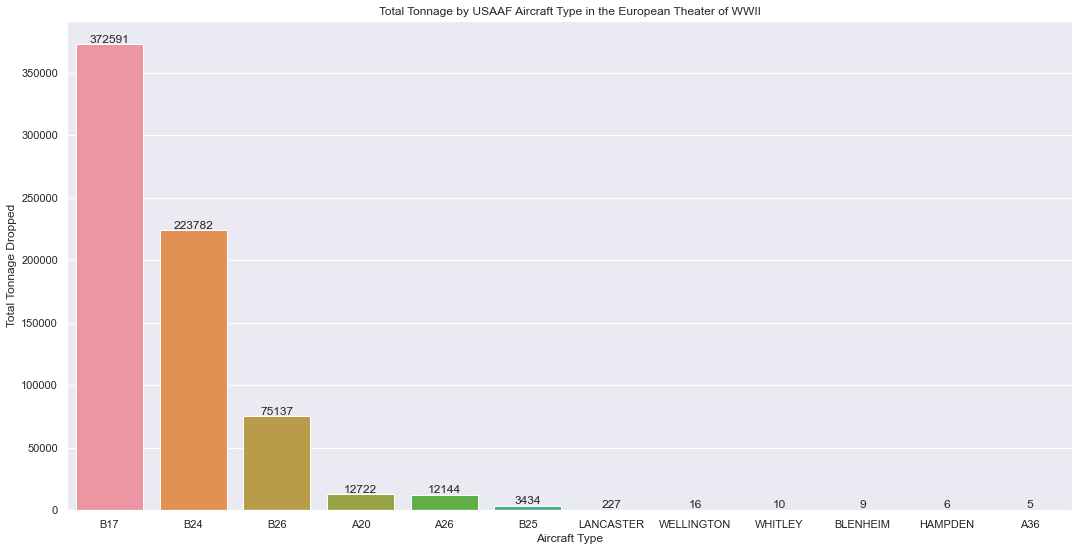

In [26]:
us_eur_plot_2 = sns.barplot(data = us_eur_tonnage_by_ac, x = 'AIRCRAFT_NAME', y = ('TOTAL_TONS', 'sum'));
us_eur_plot_2.bar_label(us_eur_plot_2.containers[0])
plt.ylabel('Total Tonnage Dropped')
plt.xlabel('Aircraft Type')
plt.title("Total Tonnage by USAAF Aircraft Type in the European Theater of WWII");

### Numbered Air Forces
Let's take a closer look at the contributions of the different numbered air forces.

In [27]:
us_eur_naf = groupby_custom(us_eur, 'NAF')
us_eur_naf

LATITUDE  LONGITUDE AC_ATTACKING             ALTITUDE ALTITUDE_FEET  \
            mean       mean         mean      sum        mean          mean   
NAF                                                                           
1 TAC  51.450373  10.071891     9.947368   5103.0  243.736196           NaN   
12 AF  46.373759  10.376485    10.284271  14254.0  161.007831  12560.066890   
15 AF  48.872390  14.977590    17.673149  89055.0  232.197628  23086.945962   
8 AF   50.741546  10.298074    10.440405  64908.0  197.805842  15380.794045   
9 AF   49.838348   5.398085    11.726316  38990.0  190.102509   1273.022727   

      NUMBER_OF_HE       LBS_HE       ... TOTAL_TONS            \
              mean   sum   mean  sum  ...       mean       sum   
NAF                                   ...                        
1 TAC          NaN   0.0    NaN  0.0  ...  24.946768   13122.0   
12 AF     6.666667  20.0    NaN  0.0  ...  22.571514   37559.0   
15 AF          NaN   0.0    NaN  0.0  ...  37.953529  217246.0   
8 AF           NaN   0.0    NaN  0.0  ...  27.130645  252315.0   
9 AF           NaN   0.0    NaN  0.0  ...  30.373417  179841.0   

      TAKEOFF_LATITUDE TAKEOFF_LONGITUDE AC_AIRBORNE          AC_DROPPING  \
                  mean              mean        mean      sum        mean   
NAF                                                                         
1 TAC              NaN               NaN    9.947368   5103.0    9.947368   
12 AF        42.200339          9.320977   10.269258  14264.0   10.285508   
15 AF              NaN               NaN   17.673149  89055.0   17.673149   
8 AF               NaN               NaN   10.440405  64908.0   10.440405   
9 AF               NaN               NaN   11.726316  38990.0   11.726316   

               ROUNDS_AMMO       
           sum        mean  sum  
NAF                              
1 TAC   5103.0         NaN  0.0  
12 AF  14266.0         NaN  0.0  
15 AF  89055.0         NaN  0.0  
8 AF   64908.0         NaN  0.0  
9 AF   38990.0         NaN  0.0  

[5 rows x 36 columns]

8th Air Force was a massive strategic bombing force based in England, established in 1942. 12th Air Force was a MTO Air Force meant to support the Invasion of North Africa. After this campaign was over, their heavy bombers were transferred to 15th Air Force. 15th Air Force was a strategic air force based in Italy and bombed targets in Southern, Central, and Eastern Europe. 9th Air Force was the major tactical air force in the European Theater. 

In [28]:
us_eur_naf_tonnage = stat_by_group(us_eur_naf, 'TOTAL_TONS', 'sum')
us_eur_naf_tonnage

,NAF,"(TOTAL_TONS, sum)"
0,8 AF,252315.0
1,15 AF,217246.0
2,9 AF,179841.0
3,12 AF,37559.0
4,1 TAC,13122.0


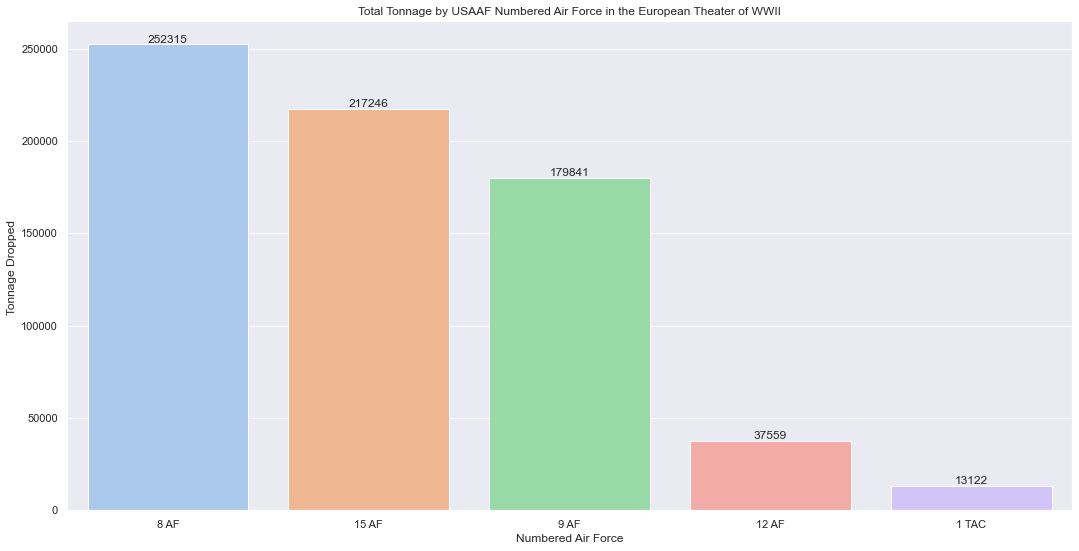

In [29]:
us_eur_plot_3 = sns.barplot(data=us_eur_naf_tonnage, x='NAF', y=('TOTAL_TONS', 'sum'), palette='pastel');
us_eur_plot_3.bar_label(us_eur_plot_3.containers[0])
plt.ylabel('Tonnage Dropped ')
plt.xlabel('Numbered Air Force')
plt.title("Total Tonnage by USAAF Numbered Air Force in the European Theater of WWII");

### Tonnage By Date

In [30]:
us_eur_date = groupby_custom(us_eur, 'Date')
us_eur_tonnage_by_date = stat_by_group(us_eur_date, 'TOTAL_TONS', 'sum').sort_values(by=('TOTAL_TONS', 'sum'), ascending=False).set_index('Date')
us_eur_tonnage_by_date = us_eur_tonnage_by_date.loc['1942-06-01':]
us_eur_tonnage_by_date

,"(TOTAL_TONS, sum)"
Date,
1944-07-25,11161.0
1944-06-06,8828.0
1944-09-17,8637.0
1944-08-25,8085.0
1944-08-24,7544.0
...,...
1945-01-04,2.0
1944-07-01,2.0
1943-12-12,2.0


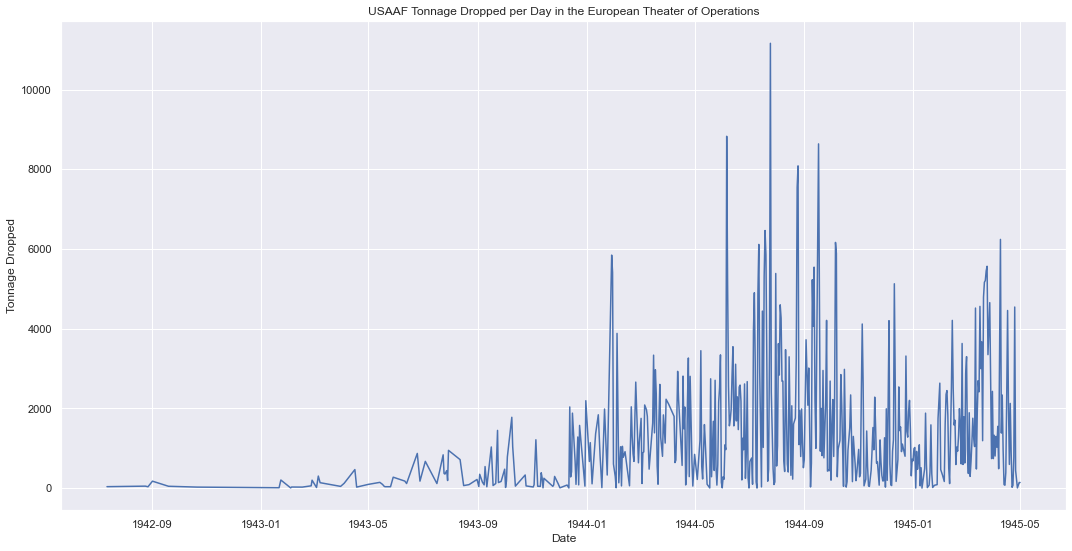

In [31]:
sns.lineplot(data=us_eur_tonnage_by_date, x='Date', y=('TOTAL_TONS', 'sum'));
plt.xlabel('Date')
plt.ylabel('Tonnage Dropped')
plt.title('USAAF Tonnage Dropped per Day in the European Theater of Operations');

### Target Analysis

In [32]:
us_eur_tgts_filtered = us_eur[~us_eur['TGT_TYPE'].isin(['UNIDENTIFIED TARGET', 'UNIDENTIFIED','UNIDENTIFIED TARGETS'])].replace(
    {'MARSHALLING YARDS': 'MARSHALLING YRD', 'MARSHALLING YARD': 'MARSHALLING YRD', 'OIL REFINERY SYNTHETIC': 'SYN OIL REFINE',
     'SYN OIL REFINERY':'SYN OIL REFINE', 'AIR DROME': 'AIRDROME', 'AIR FILED': 'AIRDROME', 'TACTICAL TARGET': 'TACTICAL TGTS',
     'TACTICAL TARGETS': 'TACTICAL TGTS'})
def top_n_category(dataframe, n, category):
    return dataframe[category].value_counts()[0:n]
top_n_target_types = top_n_category(us_eur_tgts_filtered, 10, 'TGT_TYPE')
top_n_target_types

MARSHALLING YRD     2666
CITY AREA           2643
AIRDROME            1735
SYN OIL REFINE       790
RAILROAD             649
TACTICAL TGTS        583
OIL REFINERY         514
BRIDGE               489
GP                   426
K F BORGWARD A G     309
Name: TGT_TYPE, dtype: int64

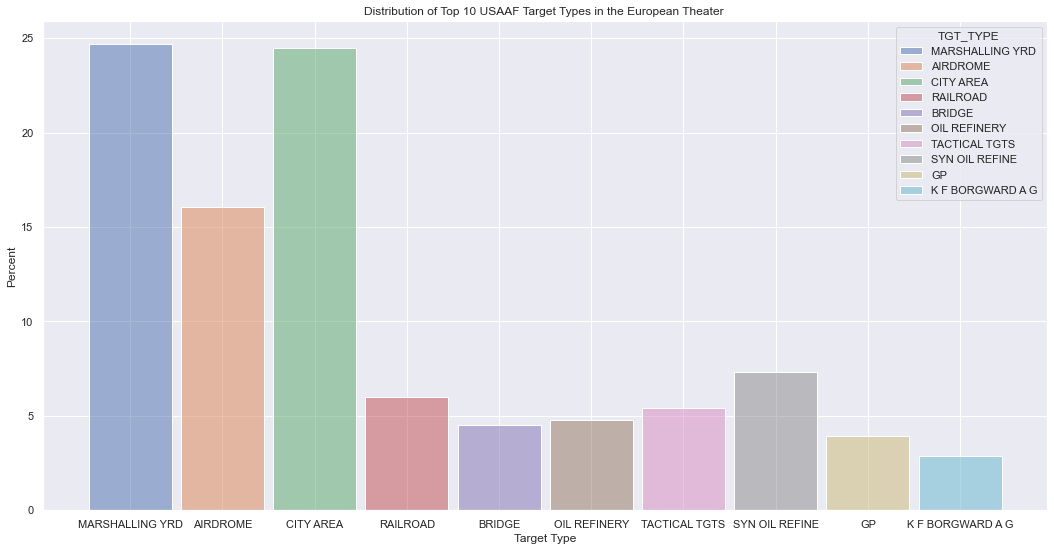

In [33]:
us_eur_top_n = us_eur_tgts_filtered[us_eur_tgts_filtered['TGT_TYPE'].isin(top_n_target_types.index)]
sns.histplot(data=us_eur_top_n, x='TGT_TYPE', stat='percent', hue='TGT_TYPE', shrink=0.9);
plt.xlabel('Target Type')
plt.title('Distribution of Top 10 USAAF Target Types in the European Theater ');

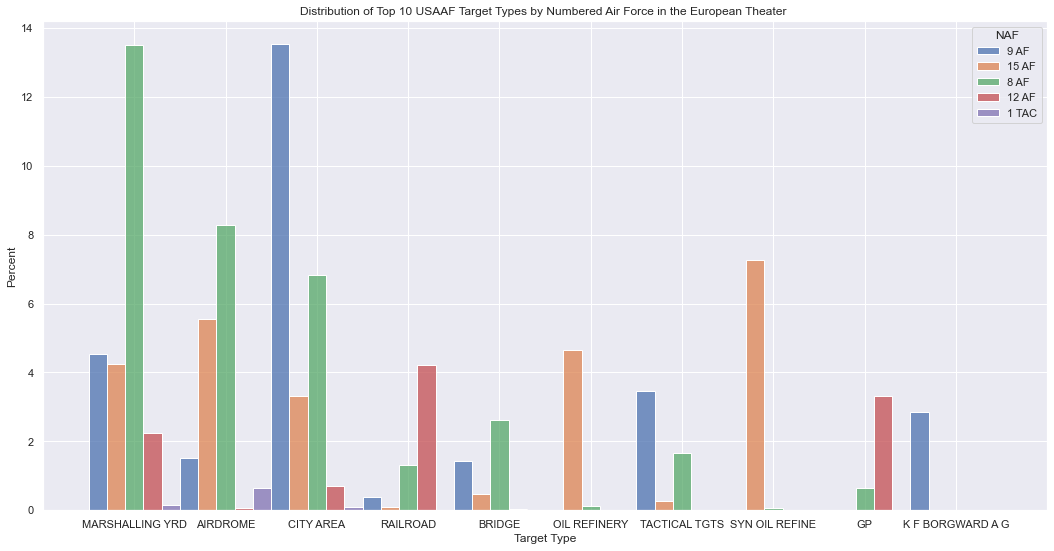

In [34]:
sns.histplot(data=us_eur_top_n, x='TGT_TYPE', stat='percent', hue='NAF', multiple='dodge');
plt.xlabel('Target Type')
plt.title('Distribution of Top 10 USAAF Target Types by Numbered Air Force in the European Theater ');

In [35]:
us_eur_tonnage_by_tgt = groupby_custom(us_eur_tgts_filtered, 'TGT_TYPE')
us_eur_top10_tons_per_tgt = stat_by_group(us_eur_tonnage_by_tgt, 'TOTAL_TONS', 'sum')[0:10]
us_eur_top10_tons_per_tgt

,TGT_TYPE,"(TOTAL_TONS, sum)"
0,MARSHALLING YRD,82781.0
1,CITY AREA,79815.0
2,AIRDROME,65500.0
3,SYN OIL REFINE,26138.0
4,OIL REFINERY,19740.0
5,TACTICAL TGTS,14758.0
6,BRIDGE,13649.0
7,GP,10593.0
8,GUN EMPLACEMENTS,9606.0
9,DAIMLER BENZ ENGINE,8980.0


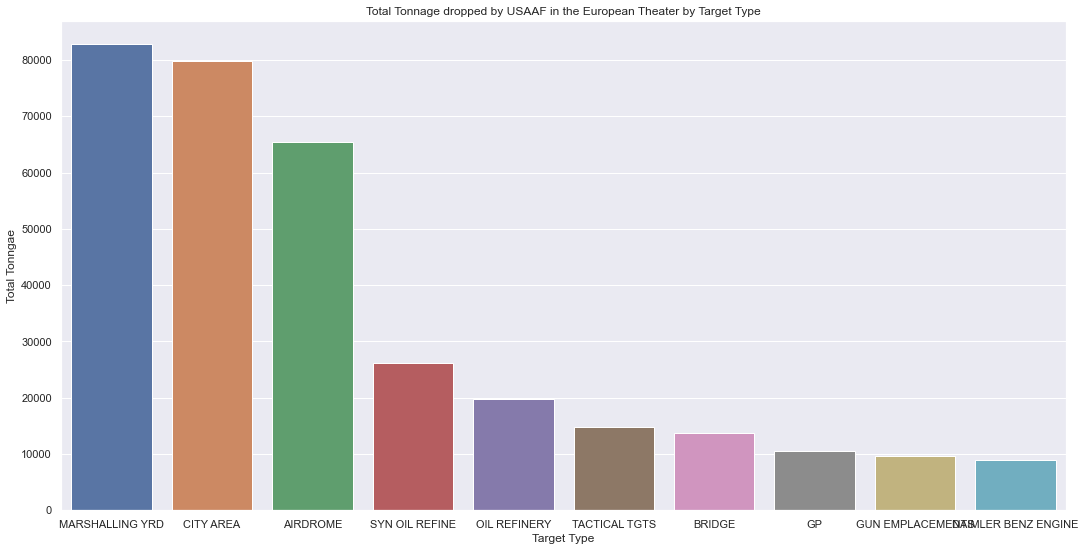

In [36]:
sns.barplot(data=us_eur_top10_tons_per_tgt, x='TGT_TYPE', y=('TOTAL_TONS', 'sum'));
plt.ylabel('Total Tonngae')
plt.xlabel('Target Type')
plt.title('Total Tonnage dropped by USAAF in the European Theater by Target Type');


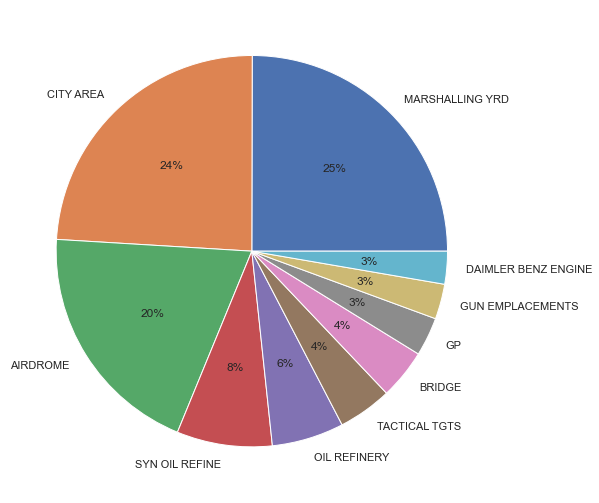

In [44]:
plt.pie(x=us_eur_top10_tons_per_tgt[('TOTAL_TONS', 'sum')], labels=us_eur_top10_tons_per_tgt['TGT_TYPE'], autopct='%.0f%%');

In [37]:
test = us_eur.groupby(by=['TGT_COUNTRY', 'TGT_TYPE']).sum()
sum(test.loc['GERMANY','TOTAL_TONS'])

393548.0